In [5]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Display plots directly in the notebook (if using Jupyter)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [11]:
cd Downloads

C:\Users\Admin\Downloads


In [12]:
df=pd.read_csv('wfp_food_prices_ken2.csv')
df['date']=pd.to_datetime(df['date'])
df.head()

,date,district,market,commodity,unit,pricetype,currency,price,standardized_price
0,2006-01-15,Mombasa,Mombasa,Maize,90 KG,Wholesale,KES,1480.00,16.444444
1,2006-01-15,Mombasa,Mombasa,Beans,KG,Wholesale,KES,33.63,33.630000
2,2006-01-15,Mombasa,Mombasa,Beans,90 KG,Wholesale,KES,3246.00,36.066667
3,2006-01-15,Kitui,Kitui,Maize,KG,Retail,KES,17.00,17.000000
4,2006-01-15,Kitui,Kitui,Potatoes,50 KG,Wholesale,KES,1249.99,24.999800


In [13]:
nested_dict = {}

for a in range(0, len(df['pricetype'].unique())):
    pricetype_name = df['pricetype'].unique()[a]
    nested_dict[pricetype_name] = {}
    df_pricetype = df[df['pricetype']==pricetype_name]
    
    for b in range(0, len(df_pricetype['district'].unique())):
        region_name = df_pricetype['district'].unique()[b]
        nested_dict[pricetype_name][region_name] = {}

        df_region = df_pricetype[df_pricetype['district'] == region_name]

        
        for d in range(0, len(df_region['commodity'].unique())):
            item_name = df_region['commodity'].unique()[d]
            nested_dict[pricetype_name][region_name][item_name] = df_region[df_region['commodity'] == item_name]

# Access nested_dict as needed
nested_dict.keys()


dict_keys(['Wholesale', 'Retail'])

In [14]:
nested_dict.keys()

dict_keys(['Wholesale', 'Retail'])

In [15]:
nested_dict['Wholesale'].keys()

dict_keys(['Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Uasin Gishu', 'Nakuru', 'Nyeri', 'Kwale', 'Makueni', 'Garissa', 'Mandera', 'Baringo', 'Kajiado', 'West Pokot', 'Machakos', 'Meru South'])

In [16]:
nested_dict['Wholesale']['Kitui'].keys()

dict_keys(['Potatoes', 'Sorghum', 'Beans', 'Maize'])

In [17]:
nested_dict['Wholesale']['Kitui']['Maize']

,date,district,market,commodity,unit,pricetype,currency,price,standardized_price
6085,2021-02-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6460,2021-06-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6561,2021-07-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6682,2021-09-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2799.0,31.100000
6767,2021-10-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2975.0,33.055556
6860,2021-11-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2997.0,33.300000


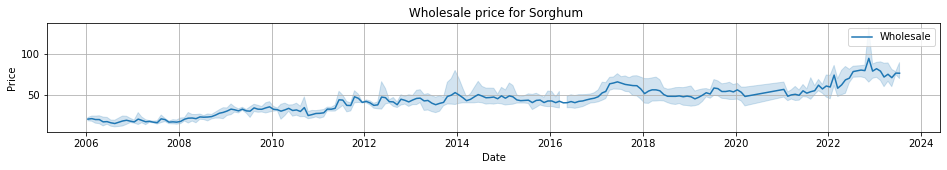

KeyboardInterrupt: 

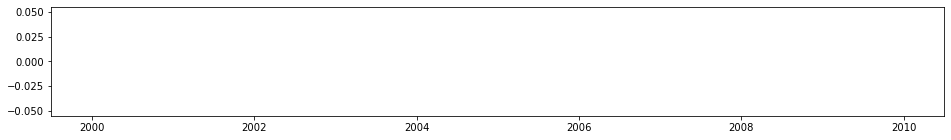

In [116]:
# Iterate through price types
for pricetype_name, pricetype_data in nested_dict.items():
    
    # Get a list of all unique commodities for the current price type
    unique_commodities = set(commodity for region_data in pricetype_data.values() for commodity in region_data.keys())
    
    # Iterate through unique commodities
    for commodity_name in unique_commodities:
        
        # Create an empty DataFrame to accumulate data for the current commodity
        df_commodity = pd.DataFrame()
        
        # Iterate through regions
        for region_name, region_data in pricetype_data.items():
            
            # Check if the commodity exists in the current region
            if commodity_name in region_data:
                # Append data for the current commodity in the current region to the DataFrame
                df_commodity = df_commodity.append(region_data[commodity_name], ignore_index=True)
        
        # Check if the DataFrame is not empty and contains 'date' and 'price' columns
        if not df_commodity.empty and 'date' in df_commodity.columns and 'price' in df_commodity.columns:
            # Plotting
            plt.figure(figsize=(16, 2))
            sns.lineplot(
                data=df_commodity,
                x='date',
                y='standardized_price',
                label=pricetype_name
            )
            plt.title(f' {pricetype_name} price for {commodity_name}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.grid()
            plt.show()
        else:
            print(f"Skipping plot for {commodity_name} ({pricetype_name}): Empty or missing 'date'/'price' columns.")


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25.272, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23.469, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=60.341, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21.743, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31.602, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.886 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  -6.872
Date:                Wed, 06 Dec 2023   AIC                             21.743
Time:                        21:16:53   BIC                  

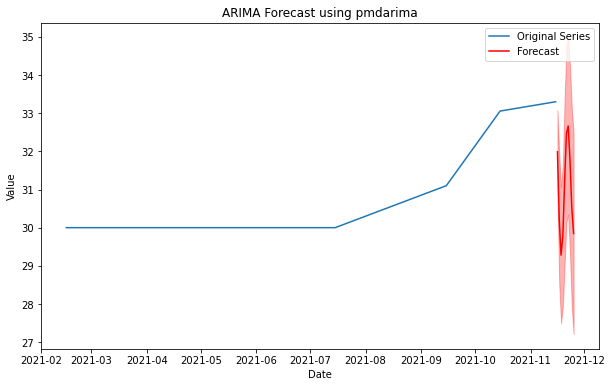

         date   forecast  lower_bound  upper_bound
6  2021-11-16  31.990048    30.901874    33.078223
7  2021-11-17  30.211209    28.520244    31.902173
8  2021-11-18  29.278327    27.498037    31.058616
9  2021-11-19  29.775074    27.924141    31.626007
10 2021-11-20  31.208343    29.052522    33.364164
11 2021-11-21  32.464540    30.144523    34.784558
12 2021-11-22  32.664416    30.344298    34.984533
13 2021-11-23  31.767769    29.329908    34.205630
14 2021-11-24  30.520775    27.918697    33.122853
15 2021-11-25  29.847260    27.213670    32.480849


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np



df = pd.DataFrame({
    'date': nested_dict['Wholesale']['Kitui']['Maize']['date'],
    'value': nested_dict['Wholesale']['Kitui']['Maize']['standardized_price']
})

#auto_arima model
model = auto_arima(df['value'], trace=True, suppress_warnings=True)

# model summary
print(model.summary())

# fitted model
n_periods = 10  
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_start_date = df['date'].iloc[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(forecast_start_date, periods=n_periods, freq='D')

#  DataFrame for the forecast
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecast': forecast,
    'lower_bound': conf_int[:, 0],
    'upper_bound': conf_int[:, 1]
})

# Plotting the original series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], label='Original Series')
forecast_start_date = df['date'].iloc[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(forecast_start_date, periods=n_periods, freq='D')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('ARIMA Forecast using pmdarima')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print(forecast_df)

In [51]:
def comod(df,nested_dict):
    item = []
    print(df['pricetype'].unique())
    item1 = input("Enter the price type from the list: ")
    if item1 not in df['pricetype'].unique():
        print('Kindly enter a valid option: ')
        print(df['pricetype'].unique())
        item1 = input("Enter the price type from the list: ")
    item.append(item1)
    print(df[df['pricetype'] == item1]['district'].unique())
    item2 = input("Enter the market you are looking for from the list: ")
    if item2 not in df[df['pricetype'] == item1]['district'].unique():
        print('Kindly enter a valid option: ')
        print(df[df['pricetype'] == item1]['district'].unique())
        item2 = input("Enter the market you are looking for from the list: ")
    item.append(item2)
    print(df[(df['pricetype'] == item1) & (df['district'] == item2)]['commodity'].unique())
    item3 = input("Enter the commodity you wish from the existing list: ")
    if item3 not in df[(df['pricetype'] == item1) & (df['district'] == item2)]['commodity'].unique():
        print('Kindly enter a valid option: ')
        print(df[(df['pricetype'] == item1) & (df['district'] == item2)]['commodity'].unique())
        item3 = input("Enter the commodity you wish from the existing list: ")
    item.append(item3)

    ref = nested_dict
    for i in item:
        ref = ref[i]
    return ref


def Arima_model(ref):
    print("\n")
    print('Model in Progress: ')
    print("\n")
    import pandas as pd
    import matplotlib.pyplot as plt
    from pmdarima import auto_arima
    import numpy as np

    df = pd.DataFrame({
        'date': ref['date'],
        'value': ref['standardized_price']
    })

    # auto_arima model
    model = auto_arima(df['value'], trace=True, suppress_warnings=True)

    # model summary
    print(model.summary())

    # fitted model
    n_periods = 365
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
    forecast_start_date = df['date'].iloc[-1] + pd.DateOffset(1)
    forecast_dates = pd.date_range(forecast_start_date, periods=n_periods, freq='D')

    # DataFrame for the forecast
    forecast_df = pd.DataFrame({
        'date': forecast_dates,
        'forecast': forecast,
        'lower_bound': conf_int[:, 0],
        'upper_bound': conf_int[:, 1]
    })

    # Plotting the original series and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['value'], label='Original Series')
    forecast_start_date = df['date'].iloc[-1] + pd.DateOffset(1)
    forecast_dates = pd.date_range(forecast_start_date, periods=n_periods, freq='D')
    plt.plot(forecast_dates, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
    plt.title(f'ARIMA price Forecast for {ref["commodity"].unique()[0]} ')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(forecast_df)



['Wholesale' 'Retail']
Enter the price type from the list: Wholesale
['Mombasa' 'Kitui' 'Nairobi' 'Kisumu' 'Uasin Gishu' 'Nakuru' 'Nyeri'
 'Kwale' 'Makueni' 'Garissa' 'Mandera' 'Baringo' 'Kajiado' 'West Pokot'
 'Machakos' 'Meru South']
Enter the market you are looking for from the list: Nairobi
['Maize' 'Potatoes' 'Sorghum' 'Beans']
Enter the commodity you wish from the existing list: beans
Kindly enter a valid option: 
['Maize' 'Potatoes' 'Sorghum' 'Beans']
Enter the commodity you wish from the existing list: Beans


Model in Progress: 


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3890.369, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4127.533, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3940.556, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3912.055, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4125.711, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3901.451, Time=0.40 sec
 ARIMA(2,1,1)(0

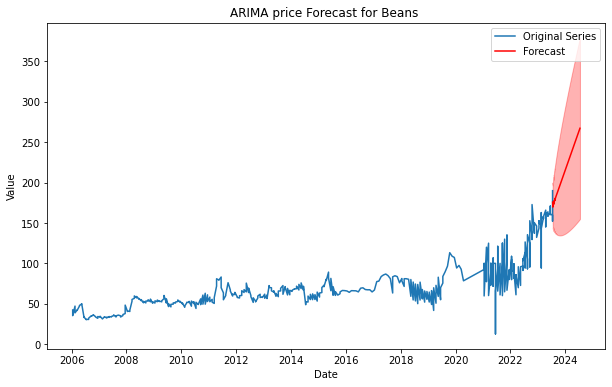

          date    forecast  lower_bound  upper_bound
495 2023-07-16  175.787576   152.188436   199.386717
496 2023-07-17  173.855469   149.128785   198.582152
497 2023-07-18  173.599045   146.922541   200.275549
498 2023-07-19  169.655872   142.650654   196.661089
499 2023-07-20  172.775384   144.579492   200.971276
..         ...         ...          ...          ...
855 2024-07-10  266.204924   154.412668   377.997179
856 2024-07-11  266.469481   154.530290   378.408671
857 2024-07-12  266.734038   154.648105   378.819970
858 2024-07-13  266.998595   154.766112   379.231077
859 2024-07-14  267.263152   154.884310   379.641993

[365 rows x 4 columns]


In [52]:
Arima_model(comod(df,nested_dict))